# 👋🌍 Hello, world: Submit a Qiskit job to Rigetti

In this notebook, we'll review the basics of Azure Quantum by submitting a simple *job*, or quantum program, to [Rigetti](https://www.rigetti.com/). We will use [Qiskit](https://qiskit.org/) to express the quantum job.

## Submit a simple job to Rigetti using Azure Quantum
Azure Quantum provides several ways to express quantum programs. In this example we are using Qiskit, but note that Q# is also supported. All code in this example will be written in Python.

Let's begin. When you see a code block, hover over it and click the triangle play-button to execute it. To avoid any compilation issues, this should be done in order from top to bottom.

### 1. Connect to the Azure Quantum workspace

To connect to the Azure Quantum service, construct an instance of the `AzureQuantumProvider` class. Note that it's imported from the `azure.quantum.qiskit` package.

In [12]:
from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider (
    resource_id = "",
    location = ""
)

Let's import some packages and see what providers and targets are enabled in this workspace with the following command:


In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

### ❕ Do you see `rigetti.sim.qvm` in your list of targets? If so, you're ready to keep going.

Don't see it? You may need to add Rigetti to your workspace to run this sample. Navigate to the **Providers** page in the portal and click **+Add** to add the Rigetti provider.

## Rigetti: The quantum provider
Azure Quantum partners with third-party companies to deliver solutions to quantum jobs. These company offerings are called *providers*. Each provider can offer multiple *targets* with different capabilities. See the table below for Rigetti's targets.

| Target name | Target ID | Number of qubits | Description |
| --- | --- | --- | --- |
| Rigetti QVM (simulator) | `rigetti.sim.qvm` | 20 qubits | Rigetti's cloud-based, [open-source](https://github.com/quil-lang/qvm) "Quantum Virtual Machine" simulator. Free to use. |
| Aspen M-2 (hardware) | `rigetti.qpu.aspen-m-2` | 80 qubits | Rigetti's "Aspen-M-2" universal, physical QPU. Read more at [Rigetti's website](https://qcs.rigetti.com/qpus). |
| Aspen M-3 (hardware) | `rigetti.qpu.aspen-m-3` | 80 qubits | Rigetti's "Aspen-M-3" universal, physical QPU. Read more at [Rigetti's website](https://qcs.rigetti.com/qpus). |


For this example, we will use `rigetti.sim.qvm`. To learn more about Rigetti's targets, check out [Rigetti's Azure Quantum documentation](https://docs.microsoft.com/azure/quantum/provider-rigetti).

### 2. Build the quantum program

Let's create a simple Qiskit circuit to run.

In [45]:
# Create a quantum circuit acting on a single qubit
circuit = QuantumCircuit(1, 1)
circuit.name = "Single qubit random"
circuit.h(0)
circuit.measure(0, 0)

# Print out the circuit
circuit.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

The circuit you built is a simple quantum random bit generator. With Rigetti's simulator, we will be able to estimate the probability of measuring a `1` or `0`.

### 3. Submit the quantum program to Rigetti

In [46]:
from azure.quantum.target.rigetti import RigettiTarget

# Create an object that represents Rigetti's simulator target, "rigetti.sim.qvm," using the packaged constant.
#   Note that any quantum computing target you have enabled in this workspace can be used here.
#   Azure Quantum makes it extremely easy to submit the same quantum program to different providers.
rigetti_simulator_backend = provider.get_backend(RigettiTarget.QVM)

# Using the Rigetti simulator target, call "run" to submit the job. We'll
# use 100 shots (simulated runs).
job = rigetti_simulator_backend.run((circuit), count=100)
print("Job id:", job.id())

Job id: 444cc976-ec31-11ec-95ba-00155d507810


The job ID can be used to retrieve the results later using the [`get_details` method](https://docs.microsoft.com/azure/quantum/optimization-job-reference#jobdetails) or by viewing it under the **Job management** section of the portal.

### 4. Obtain the job results
You can monitor the job status with Qiskit's `job_monitor` function.

This may take a minute or so ⏳. Your job will be packaged and sent to Rigetti, where it will wait its turn to be run. You'll see your job go through these stages: "job is queued" -> "job is actively running" -> "job has successfully run."

Job Status: job has successfully run


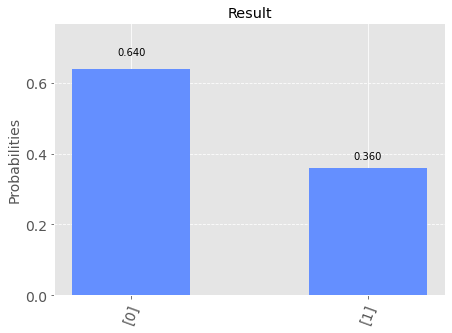

In [47]:
import matplotlib.pyplot as plt

# Style the plot for readability.
plt.style.use('ggplot')

# Monitor the job.
job_monitor(job)
result = job.result()

# The result object is native to the Qiskit package, so we can use Qiskit's tools to print the result as a histogram.
plot_histogram(result.get_counts(circuit), title="Result")

**See the histogram above? Congratulations, you've submitted a job with Azure Quantum! 👏**


### 5. Next steps
Next, you can try running a program on one of Rigetti's hardware targets. Just replace `RigettiTarget.QVM` with `RigettiTarget.ASPEN_M_2` or `RigettiTarget.ASPEN_M_3`. Or try another sample by navigating back to the sample gallery. The same "hello world" sample can be run with different quantum providers by choosing another option in the gallery card drop-down menu. Don't worry - your work here is automatically saved.

To learn more about submitting Qiskit circuits to Azure Quantum, review the Qiskit section of the [Azure Quantum documentation's page on Qiskit jobs](https://docs.microsoft.com/azure/quantum/quickstart-microsoft-qiskit?pivots=platform-rigetti).

To learn more about job pricing, review the [Azure Quantum documentation's pricing page](https://docs.microsoft.com/azure/quantum/azure-quantum-job-costs).